In [69]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [70]:
df = pd.read_csv('train.csv')

In [71]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [72]:
df.shape

(891, 12)

In [73]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [74]:
df = df.drop(columns = ['Name', 'Ticket', 'Cabin'])

In [75]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [76]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [77]:
np.where(df['Embarked'].isnull()) #localização dos nulos na coluna Embarked 

(array([ 61, 829], dtype=int64),)

In [78]:
df = df.drop(labels = [61,829], axis=0) #remoção das linhas 

In [79]:
df.isnull().sum() #verificação 

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

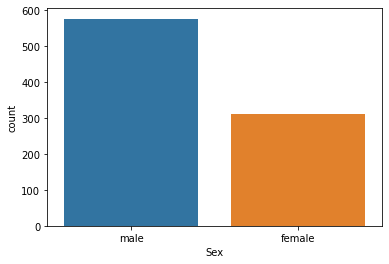

In [80]:
sns.countplot(x=df['Sex']) #géneros 

In [81]:
df['Sex'].value_counts() #contagem 

male      577
female    312
Name: Sex, dtype: int64

In [82]:
median_male = df.loc[(df['Sex']=='male') ].median() #cálculo da mediana dos homens 
median_male

C:\Users\PTL14736\AppData\Local\Temp\ipykernel_26724\3268121266.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  median_male = df.loc[(df['Sex']=='male') ].median() #cálculo da mediana dos homens


PassengerId    464.0
Survived         0.0
Pclass           3.0
Age             29.0
SibSp            0.0
Parch            0.0
Fare            10.5
dtype: float64

In [83]:
df.loc[(df['Sex']=='male')] = df.loc[(df['Sex']=='male')].replace(np.nan,29) #substituição dos nulos dos homens pela sua mediana 

In [84]:
median_female = df.loc[(df['Sex']=='female') ].median() #cálculo da mediana dos homens 
median_female

C:\Users\PTL14736\AppData\Local\Temp\ipykernel_26724\4035485940.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  median_female = df.loc[(df['Sex']=='female') ].median() #cálculo da mediana dos homens


PassengerId    414.5
Survived         1.0
Pclass           2.0
Age             27.0
SibSp            0.0
Parch            0.0
Fare            23.0
dtype: float64

In [85]:
df.loc[(df['Sex']=='female')] = df.loc[(df['Sex']=='female')].replace(np.nan,27) #substituição dos nulos das mulheres pela sua mediana 

In [86]:
df.isnull().sum() #verificação 

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [87]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Sex'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>],
       [<AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'Fare'}>,
        <AxesSubplot:title={'center':'Embarked'}>]], dtype=object)

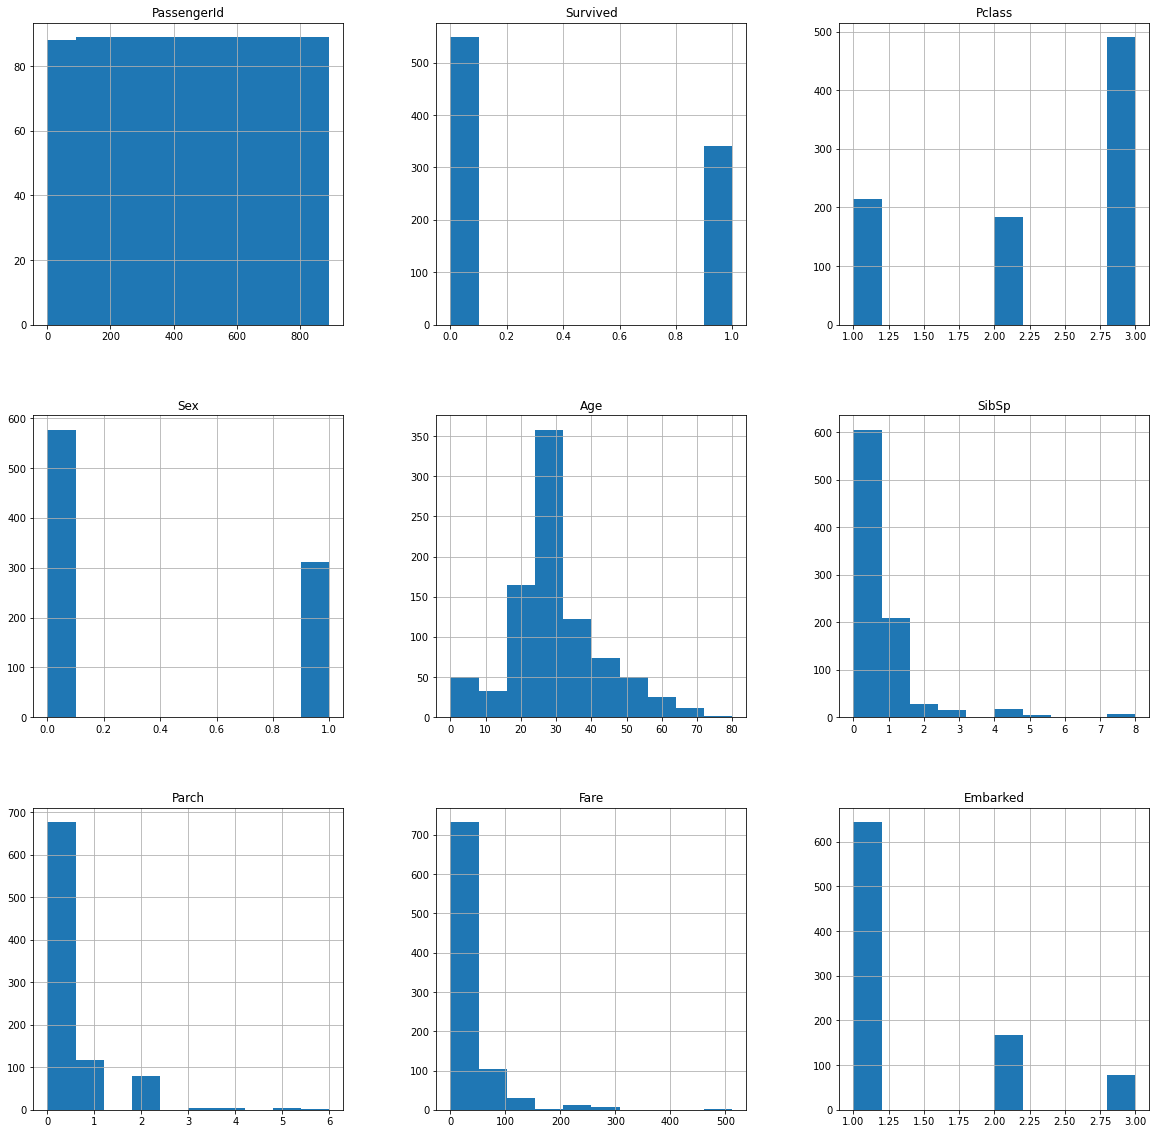

In [127]:
df.hist(figsize=(20,20)) 

[Text(0, 0, '549'), Text(0, 0, '340')]

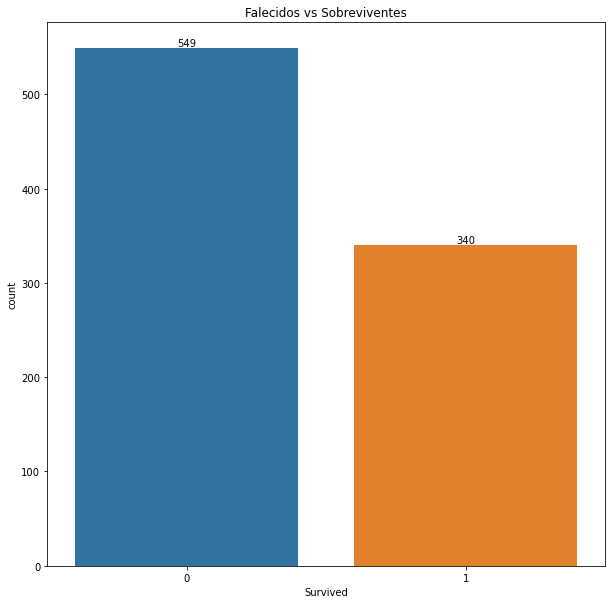

In [88]:
plt.figure(figsize=(10,10))
a = sns.countplot(x=df['Survived'])
plt.title('Falecidos vs Sobreviventes')
a.bar_label(a.containers[0])

[Text(0, 0, '468'), Text(0, 0, '81')]

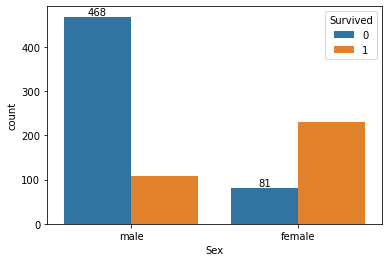

In [110]:
c = sns.countplot(x='Sex', hue='Survived', data=df)
df.groupby('Sex')['Survived'].count()
c.bar_label(c.containers[0])

In [89]:
df['Survived'].value_counts() #verificação 

0    549
1    340
Name: Survived, dtype: int64

In [91]:
df_survived = df.loc[(df['Survived']==1)]

In [92]:
df_survived.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
8,9,1,3,female,27.0,0,2,11.1333,S
9,10,1,2,female,14.0,1,0,30.0708,C


[Text(0, 0, '231'), Text(0, 0, '109')]

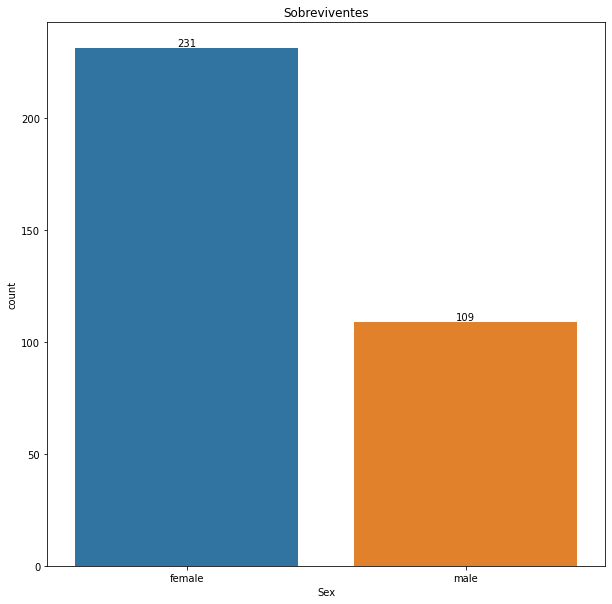

In [104]:
plt.figure(figsize=(10,10))
b = sns.countplot(x=df_survived['Sex'])
plt.title('Sobreviventes')
b.bar_label(b.containers[0])

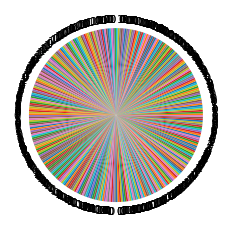

In [131]:
y = df['Sex']
mylabels = df["Survived"]

plt.pie(y, labels = mylabels)
plt.show() 

[Text(0, 0, '89'), Text(0, 0, '70'), Text(0, 0, '72')]

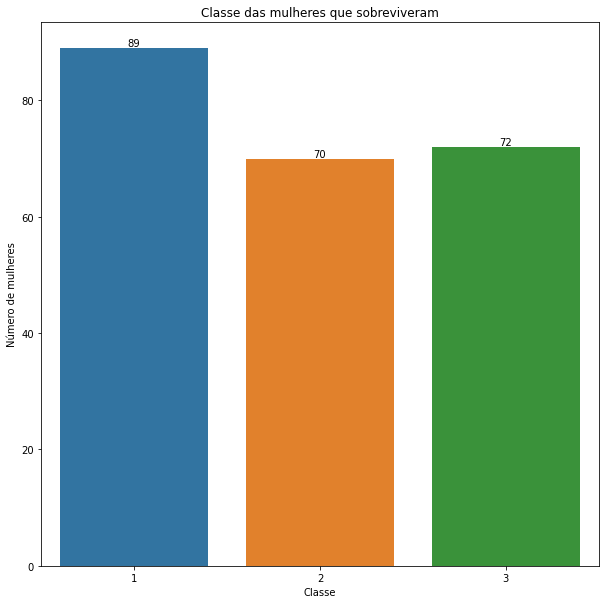

In [57]:
plt.figure(figsize=(10,10))
ax = sns.countplot(x='Pclass', data=df.loc[(df['Sex']=='female') & (df['Survived']==1)])
plt.title('Classe das mulheres que sobreviveram')
plt.xlabel("Classe")
plt.ylabel("Número de mulheres")
ax.bar_label(ax.containers[0])

[Text(0, 0, '45'), Text(0, 0, '17'), Text(0, 0, '47')]

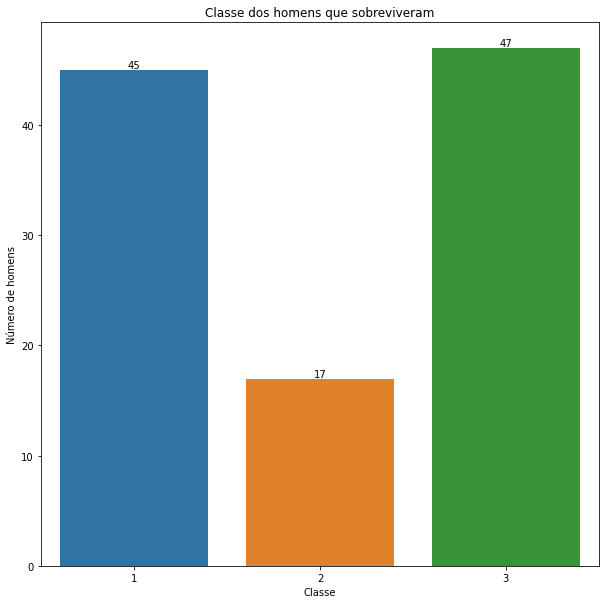

In [95]:
plt.figure(figsize=(10,10))
bx = sns.countplot(x='Pclass', data=df.loc[(df['Sex']=='male') & (df['Survived']==1)])
plt.title('Classe dos homens que sobreviveram')
plt.xlabel("Classe")
plt.ylabel("Número de homens")
bx.bar_label(bx.containers[0])

In [23]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

In [24]:
Sex = {'male':0, 'female':1} #criação de dicionário para associar os géneros a números 

In [125]:
df['Sex'] = df['Sex'].map(Sex) #substituição 

<AxesSubplot:xlabel='Embarked', ylabel='count'>

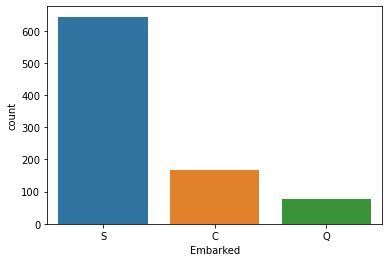

In [120]:
sns.countplot(x=df['Embarked'])

In [121]:
Embarked = {'S':1, 'C':2, 'Q':3} #Mapear a coluna Embarked 

In [122]:
df['Embarked'] = df['Embarked'].map(Embarked) #substituição 

In [123]:
df['Age'] = df['Age'].astype('int64')

In [126]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int64
Age              int64
SibSp            int64
Parch            int64
Fare           float64
Embarked         int64
dtype: object